In [65]:
import pandas as pd
import numpy as np
from scipy.stats import poisson 
from matplotlib import pyplot as plt
import seaborn as sns


In [66]:
tabla = pd.read_html('https://mexico.as.com/resultados/futbol/mexico_apertura/clasificacion/',encoding='UTF-8')
club = tabla[1]['Equipo'].str.split("  ", n = 1, expand = True)
club1 = club[1].str.split("  ", n = 1, expand = True)
club=club1[0]
jornada = pd.read_html('https://mexico.as.com/resultados/futbol/mexico_apertura/calendario/?omnil=mpal')
tablalocal = tabla[1]
tablavisita = tabla[2]
tablagral=tablalocal+tablavisita
tablagral.Equipo = club
stats_gral=tablagral.describe()
jornadascompletas=int(5)
local=jornada[jornadascompletas]['Equipo local']
visita=jornada[jornadascompletas]['Equipo visitante']
tablagral

,Equipo,Pts.,PJ,PG,PE,PP,GF,GC
0,Toluca,13,6,4,1,1,10,6
1,Rayados,12,5,4,0,1,11,6
2,Tigres,12,5,4,0,1,7,3
3,Necaxa,9,5,3,0,2,6,5
4,Puebla,8,5,2,2,1,8,6
5,Pachuca,8,5,2,2,1,5,4
6,Pumas,7,5,1,4,0,6,5
7,Xolos,7,5,2,1,2,5,5
8,León FC,6,5,1,3,1,6,6
9,Bravos,6,6,1,3,2,4,4


In [67]:
GF_promedio=tablagral.GF/tablagral.PJ
GC_promedio=tablagral.GC/tablagral.PJ
goles_promedio_ligamx=stats_gral.GF[1]/stats_gral.PJ[1]
ataque=GF_promedio/goles_promedio_ligamx
defensa=GC_promedio/goles_promedio_ligamx
mx_av=pd.DataFrame({'Equipo':club, 'GF prom':GF_promedio,'ataque':ataque,'GC prom':GC_promedio,'defensa':defensa})
matrix_goles=pd.DataFrame()
ind=list(range(0,len(mx_av)))

for i in ind:
    matrix_goles[i]=mx_av['ataque'][ind[i]]*mx_av['defensa'][:]*goles_promedio_ligamx

matrix_goles.columns=club
matrix_goles.index=club
GFx_local=np.diag(matrix_goles[local].loc[visita])
GFx_visita=np.diag(matrix_goles[visita].loc[local])

k=[0,1,2,3,4,5]
P_home=pd.DataFrame()
P_away=pd.DataFrame()
mu=GFx_local
mu2=GFx_visita

for i in k:
    P_home[i]=poisson.pmf(k[i],mu)
    P_away[i]=poisson.pmf(k[i],mu2)

P_home.index=local
P_away.index=visita

tamañojornada=len(local)
g=pd.DataFrame()
ind=list(range(0,tamañojornada))

for i in ind: 
    tabla=pd.DataFrame({local[i]:P_home.iloc[i].tolist(),visita[i]:P_away.iloc[i].tolist()})
    tabla.to_csv('tablamx{}.csv'.format(i),index=False, sep=',')
    p=tabla.idxmax()
    g=pd.concat([g,p])

g=g[0]
Pgoles_home=g[local]
Pgoles_away=g[visita]
Pgoles_home.index=ind
Pgoles_away.index=ind

tabla=pd.DataFrame()
winlcl=pd.DataFrame()
winvis=pd.DataFrame()
e=pd.DataFrame()
ind=list(range(0,9))

for i in ind:
    tabla=pd.read_csv('tablamx{}.csv'.format(ind[i]))
    empate=pd.Series(tabla.iloc[0][0]*tabla.iloc[0][1]+tabla.iloc[1][0]*tabla.iloc[1][1]+tabla.iloc[2][0]*tabla.iloc[2][1]+tabla.iloc[3][0]*tabla.iloc[3][1]+tabla.iloc[4][0]*tabla.iloc[4][1]+tabla.iloc[5][0]*tabla.iloc[5][1])
    vis=pd.Series(tabla.iloc[0][0]*tabla.iloc[1][1]+tabla.iloc[0][0]*tabla.iloc[2][1]+tabla.iloc[0][0]*tabla.iloc[3][1]+tabla.iloc[0][0]*tabla.iloc[4][1]+tabla.iloc[0][0]*tabla.iloc[5][1]+tabla.iloc[1][0]*tabla.iloc[2][1]+tabla.iloc[1][0]*tabla.iloc[3][1]+tabla.iloc[1][0]*tabla.iloc[4][1]+tabla.iloc[1][0]*tabla.iloc[5][1]+tabla.iloc[2][0]*tabla.iloc[3][1]+tabla.iloc[2][0]*tabla.iloc[4][1]+tabla.iloc[2][0]*tabla.iloc[5][1]+tabla.iloc[3][0]*tabla.iloc[4][1]+tabla.iloc[3][0]*tabla.iloc[5][1]+tabla.iloc[4][0]*tabla.iloc[5][1])
    lcl=pd.Series(tabla.iloc[0][1]*tabla.iloc[1][0]+tabla.iloc[0][1]*tabla.iloc[2][0]+tabla.iloc[0][1]*tabla.iloc[3][0]+tabla.iloc[0][1]*tabla.iloc[4][0]+tabla.iloc[0][1]*tabla.iloc[5][0]+tabla.iloc[1][1]*tabla.iloc[2][0]+tabla.iloc[1][1]*tabla.iloc[3][0]+tabla.iloc[1][1]*tabla.iloc[4][0]+tabla.iloc[1][1]*tabla.iloc[5][0]+tabla.iloc[2][1]*tabla.iloc[3][0]+tabla.iloc[2][1]*tabla.iloc[4][0]+tabla.iloc[2][1]*tabla.iloc[5][0]+tabla.iloc[3][1]*tabla.iloc[4][0]+tabla.iloc[3][1]*tabla.iloc[5][0]+tabla.iloc[4][1]*tabla.iloc[5][0])
    e=pd.concat([e,empate])
    winvis=pd.concat([winvis,vis])
    winlcl=pd.concat([winlcl,lcl])

winvis.index=ind
winlcl.index=ind
e.index=ind
visita_gane=winvis
local_gane=winlcl
empate=e

esperanza = pd.DataFrame({'local':local,'E GF local':GFx_local,'E GF visita':GFx_visita,'visita':visita})
esperanza.to_csv('mx_esperanza_goles_jornada{}.csv'.format(jornadascompletas),index=False, sep=',')
esperanza

,local,E GF local,E GF visita,visita
0,Bravos,0.566038,0.943396,Toluca
1,Cruz Azul,1.358491,1.833962,Necaxa
2,Tigres,2.377358,0.407547,Gallos Blancos
3,Chivas,0.407547,0.679245,Pachuca
4,Puebla,1.086792,0.611321,Atlético San Luis
5,Xolos,1.358491,0.849057,Mazatlán Fútbol Club
6,Pumas,1.222642,1.867925,Rayados
7,Santos Laguna,2.292453,1.783019,Atlas
8,León FC,1.273585,0.764151,América


In [68]:
pronostico = pd.DataFrame({'local':local,'P GF local':Pgoles_home,'P GF visita':Pgoles_away,'visita':visita})
pronostico.to_csv('mx_pronostico_goles_jornada{}.csv'.format(jornadascompletas),index=False, sep=',')
pronostico

,local,P GF local,P GF visita,visita
0,Bravos,0.0,0.0,Toluca
1,Cruz Azul,1.0,1.0,Necaxa
2,Tigres,2.0,0.0,Gallos Blancos
3,Chivas,0.0,0.0,Pachuca
4,Puebla,1.0,0.0,Atlético San Luis
5,Xolos,1.0,0.0,Mazatlán Fútbol Club
6,Pumas,1.0,1.0,Rayados
7,Santos Laguna,2.0,1.0,Atlas
8,León FC,1.0,0.0,América


In [69]:
probabilidades=pd.DataFrame({'local':local, 'P ganar local':local_gane[0], 'P empate':empate[0], 'P ganar visita':visita_gane[0], 'visita':visita})
probabilidades.sort_values(by='P ganar local', ascending=False)
probabilidades.to_csv('mx_probabilidades_jornada{}.csv'.format(jornadascompletas),index=False, sep=',')
probabilidades

,local,P ganar local,P empate,P ganar visita,visita
0,Bravos,0.212551,0.355791,0.431190,Toluca
1,Cruz Azul,0.282529,0.227794,0.475653,Necaxa
2,Tigres,0.780523,0.137695,0.047451,Gallos Blancos
3,Chivas,0.192594,0.437333,0.369993,Pachuca
4,Puebla,0.467286,0.326380,0.205380,Atlético San Luis
5,Xolos,0.484521,0.278431,0.234030,Mazatlán Fútbol Club
6,Pumas,0.247532,0.226024,0.512562,Rayados
7,Santos Laguna,0.467609,0.199144,0.294027,Atlas
8,León FC,0.482936,0.291562,0.223341,América


In [70]:
jornadascompletas=4
j=list(range(0,jornadascompletas))
resultado_local=pd.DataFrame()
resultado_visita=pd.DataFrame()
for i in j:
    resultado=jornada[i].Resultado.str.split("-", n = 1, expand = True).astype(int)
    resultado_local[i]=pd.Series(resultado[0])
    resultado_visita[i]=pd.Series(resultado[1])


resultado_local=resultado_local.fillna(0)
resultado_visita=resultado_visita.fillna(0)
resultado_local.to_csv('mx_resultado_local.csv')
resultado_visita.to_csv('mx_resultado_visita.csv')
equipo_local=pd.DataFrame()
equipo_visita=pd.DataFrame()

for i in j:
    equipo_local[i]=jornada[i]['Equipo local']
    equipo_visita[i]=jornada[i]['Equipo visitante']

equipo_local=equipo_local.fillna(0)
equipo_visita=equipo_visita.fillna(0)
equipo_local.to_csv('mx_equipo_local.cvs',sep=',')
equipo_visita.to_csv('mx_equipo_visita.cvs',sep=',')

for i in j:
    pd.DataFrame({'equipo local':equipo_local[i],'goles local':resultado_local[i],'goles visita':resultado_visita[i],'equipo visita':equipo_visita[i]}).to_csv('mx_jornada{}.csv'.format(i),index=False)

suma_goles_local_jornada=resultado_local.sum()
suma_goles_visita_jornada=resultado_visita.sum()
dif_goles=suma_goles_local_jornada-suma_goles_visita_jornada

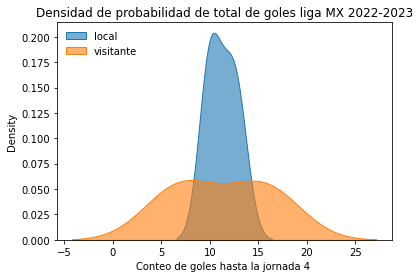

In [71]:
sns.kdeplot(data=suma_goles_local_jornada,shade=True,bw_adjust=1,label='local',alpha=0.6)
sns.kdeplot(data=suma_goles_visita_jornada,shade=True,bw_adjust=1,label='visitante',alpha=0.6)
plt.xlabel("Conteo de goles hasta la jornada {} ".format(jornadascompletas))
plt.legend(loc='upper left', prop={'size': 10}, frameon=False)
plt.title('Densidad de probabilidad de total de goles liga MX 2022-2023')
plt.savefig('mx_dist_local_visita.png')
plt.show()

/Users/boinas/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


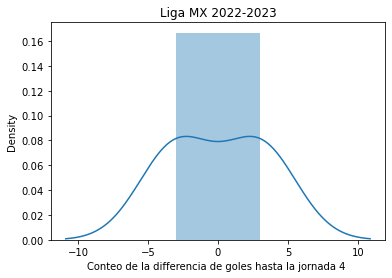

In [72]:
sns.distplot(dif_goles)
plt.xlabel("Conteo de la differencia de goles hasta la jornada {} ".format(jornadascompletas))
plt.title('Liga MX 2022-2023')
plt.savefig('mx_distribucion_dif.png')
plt.show()

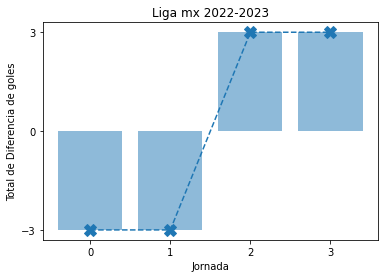

In [73]:
plt.plot(dif_goles,"--X",markersize=12)
plt.bar(j,dif_goles,alpha=.5)
plt.xlabel("Jornada")
plt.ylabel("Total de Diferencia de goles")
plt.title('Liga mx 2022-2023')
plt.xticks([0,1,2,3])
plt.yticks([-3,0,3])
plt.savefig('mx_diffbarras.png')
plt.show()

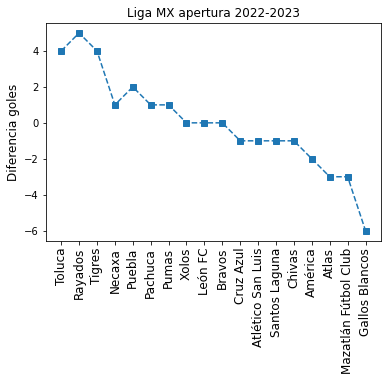

In [74]:
y=list(tablagral.GF-tablagral.GC)
x=list(range(0,len(club)))
X=list(range(0,max(y)))
plt.plot(club,y,'s--')
plt.xticks(x, club, rotation='vertical',fontsize=12)
plt.ylabel('Diferencia goles',fontsize=12)
plt.title("Liga MX apertura 2022-2023",fontsize=12)
plt.savefig('mx_dif_equipos.png')
plt.show()


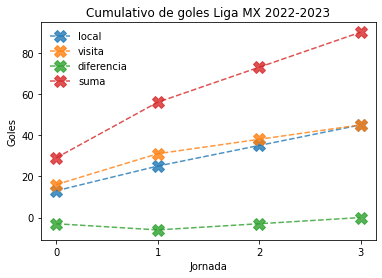

In [75]:
local_cumulativo=np.array(suma_goles_local_jornada)
visita_cumulativo=np.array(suma_goles_visita_jornada)
plt.plot(np.cumsum(local_cumulativo),"--X",markersize=12,label='local',alpha=0.8,linewidth=1.5)
plt.plot(np.cumsum(visita_cumulativo),"--X",markersize=12,label='visita',alpha=0.8,linewidth=1.5)
plt.plot(np.cumsum(local_cumulativo-visita_cumulativo),"--X",markersize=12,label='diferencia',alpha=0.8,linewidth=1.5)
plt.plot(np.cumsum(local_cumulativo+visita_cumulativo),"--X",markersize=12,label='suma',alpha=0.8,linewidth=1.5)
plt.legend(loc='upper left', prop={'size': 10}, frameon=False)
plt.title("Cumulativo de goles Liga MX 2022-2023")
plt.ylabel('Goles')
plt.xlabel('Jornada')
plt.xticks([0,1,2,3])
plt.savefig('mx_cumulativo.png')
plt.show()